<a href="https://colab.research.google.com/github/TharunSaiVT/INFO-5731/blob/main/V_T_Tharun_Sai_Exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [2]:
# Write your code here
# Write your code here
#Write your code here.
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
import re
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

def load_sentiment_files(file1, file2):
    try:
        # Read file1 and file2
        with open(file1, 'r', encoding='utf-8') as f1, open(file2, 'r', encoding='utf-8') as f2:
            file1_lines = f1.readlines()
            file2_lines = f2.readlines()

        # Parse sentiment and review from file1
        file1_sentiments = []
        file1_reviews = []
        for line in file1_lines:
            sentiment, review = line.strip().split(' ', 1)
            file1_sentiments.append(int(sentiment))
            file1_reviews.append(review)

        # Parse sentiment and review from file2
        file2_sentiments = []
        file2_reviews = []
        for line in file2_lines:
            sentiment, review = line.strip().split(' ', 1)
            file2_sentiments.append(int(sentiment))
            file2_reviews.append(review)

        # Create DataFrames
        df1 = pd.DataFrame({'sentiment': file1_sentiments, 'review': file1_reviews})
        df2 = pd.DataFrame({'sentiment': file2_sentiments, 'review': file2_reviews})

        return df1, df2

    except Exception as e:
        print(f"Error loading sentiment files: {e}")
        return None, None

# Example usage:
file1_path =  '/content/drive/My Drive/Colab Notebooks/stsa-train.txt'
file2_path = '/content/drive/My Drive/Colab Notebooks/stsa-test.txt'

train_df, test_df = load_sentiment_files(file1_path, file2_path)

# Display the first few rows of each DataFrame
if train_df is not None and test_df is not None:
    print("Training Data:")
    print(train_df.head())

    print("\nTest Data:")
    print(test_df.head())
else:
    print("Error loading sentiment files.")

Training Data:
   sentiment                                             review
0          1  a stirring , funny and finally transporting re...
1          0  apparently reassembled from the cutting-room f...
2          0  they presume their audience wo n't sit still f...
3          1  this is a visually stunning rumination on love...
4          1  jonathan parker 's bartleby should have been t...

Test Data:
   sentiment                                             review
0          0     no movement , no yuks , not much of anything .
1          0  a gob of drivel so sickly sweet , even the eag...
2          0  gangs of new york is an unapologetic mess , wh...
3          0  we never really feel involved with the story ,...
4          1            this is one of polanski 's best films .


In [5]:
from sklearn.model_selection import train_test_split
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['review'], train_df['sentiment'], test_size=0.2, random_state=42)

In [6]:
# Train and evaluate classifier
def train_and_evaluate_classifier(clf, name):
    print(f'Evaluating {name}...')
    # Use CountVectorizer to transform the text data into a matrix of word counts
    vectorizer = CountVectorizer(stop_words='english')
    X_train_vec = vectorizer.fit_transform(X_train)
    X_val_vec = vectorizer.transform(X_val)

    # Train the classifier using 10-fold cross-validation
    scores = cross_val_score(clf, X_train_vec, y_train, cv=10)
    print(f'Mean {name} cross-validation accuracy: {scores.mean()}')

    # Fit the classifier to the entire training data and make predictions on the validation set
    clf.fit(X_train_vec, y_train)
    y_val_pred = clf.predict(X_val_vec)

    # Evaluate the classifier on the validation set
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    print(f'{name} validation accuracy: {accuracy}')
    print(f'{name} validation precision: {precision}')
    print(f'{name} validation recall: {recall}')
    print(f'{name} validation F1 score: {f1}')
    print('-'*40)

In [7]:
# Train and evaluate the classifiers
nb = MultinomialNB()
train_and_evaluate_classifier(nb, 'MultinomialNB')

svm = SVC(kernel='linear')
train_and_evaluate_classifier(svm, 'SVM')

knn = KNeighborsClassifier()
train_and_evaluate_classifier(knn, 'KNN')

dt = DecisionTreeClassifier()
train_and_evaluate_classifier(dt, 'Decision Tree')

rf = RandomForestClassifier()
train_and_evaluate_classifier(rf, 'Random Forest')

xgb = XGBClassifier()
train_and_evaluate_classifier(xgb, 'XGBoost')

Evaluating MultinomialNB...
Mean MultinomialNB cross-validation accuracy: 0.7720343906881401
MultinomialNB validation accuracy: 0.7846820809248555
MultinomialNB validation precision: 0.7539779681762546
MultinomialNB validation recall: 0.8639551192145862
MultinomialNB validation F1 score: 0.8052287581699346
----------------------------------------
Evaluating SVM...
Mean SVM cross-validation accuracy: 0.7366396615768276
SVM validation accuracy: 0.7622832369942196
SVM validation precision: 0.7594594594594595
SVM validation recall: 0.788218793828892
SVM validation F1 score: 0.7735719201651756
----------------------------------------
Evaluating KNN...
Mean KNN cross-validation accuracy: 0.5408314347079599
KNN validation accuracy: 0.5614161849710982
KNN validation precision: 0.5629453681710214
KNN validation recall: 0.664796633941094
KNN validation F1 score: 0.6096463022508037
----------------------------------------
Evaluating Decision Tree...
Mean Decision Tree cross-validation accuracy: 0

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [8]:
# Write your code here
#Write your code here.

reviews_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Amazon_Unlocked_Mobile.csv')
reviews_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [9]:
reviews_df.shape

(413840, 6)

<Axes: xlabel='Rating', ylabel='count'>

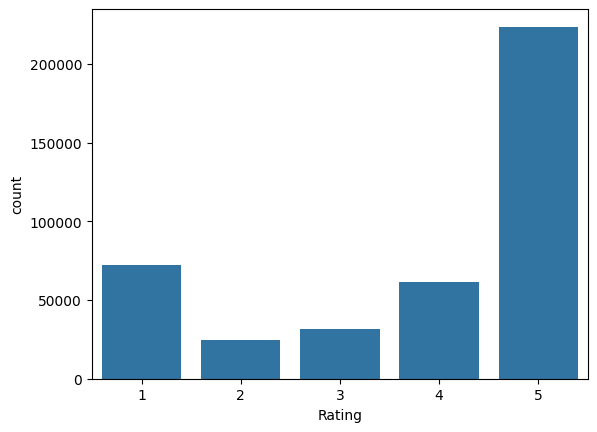

In [10]:
# understand distribution of customer ratings.
import seaborn as sns
sns.countplot(x = "Rating", data=reviews_df)

In [11]:
reviews_df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

# **Data preprocessing**

In [12]:
#function
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

In [13]:
#changing reviews with score less than 3 to be positive
actualScore = reviews_df['Rating']
positiveNegative = actualScore.map(partition)
reviews_df['Rating'] = positiveNegative

In [14]:
reviews_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0


In [15]:
reviews_df['Rating'].value_counts()

Rating
positive    316762
negative     97078
Name: count, dtype: int64

In [16]:
# dropping duplicate columns.
final = reviews_df.drop_duplicates()
final.shape

(348057, 6)

In [17]:
final['Rating'].value_counts()

Rating
positive    263142
negative     84915
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

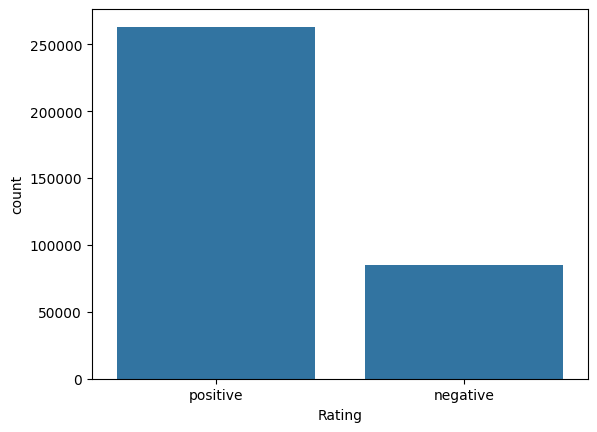

In [18]:
sns.countplot(x='Rating', data=final)

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'no', 'a', 'through', 'any', 'before', 'below', "couldn't", 'o', 'was', "hadn't", 'an', "that'll", 't', 'them', 'who', 'mightn', 'between', "hasn't", 'ours', 'some', 'so', 'can', 'more', 'him', "wasn't", 'wasn', 'same', "isn't", 'shouldn', "shouldn't", 'most', 'did', 'this', 'aren', 'own', 'over', 'or', 'from', "aren't", 'during', 'is', 'it', 'here', 'of', 'on', 'will', 'now', 'we', 'off', "wouldn't", 'once', 're', 'me', 'and', 'll', 'when', 'into', 'while', 'each', 'as', 'than', 'why', 'theirs', 'all', 've', 'very', 'just', 'had', 'how', 'which', 'up', 'yours', 'do', 'not', "you'll", 'shan', 'because', 'my', 'are', 'but', "weren't", "should've", 'hasn', 'wouldn', 'there', 'ma', 'whom', 'above', 'yourself', 'being', 'having', 'weren', "you're", 'these', 'have', 'themselves', 'd', 'both', 'nor', 'the', 'with', 'y', 'you', 'further', 'after', 'hers', "doesn't", 'his', 'those', 'out', 'didn', 'where', 'i', 'that', "haven't", 'if', 'her', 'what', 'its', 'itself', 'does', 'about', 'they', 

In [21]:
final['Reviews'] = final.Reviews.astype('str')

<ipython-input-21-9c7e7f3e6944>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Reviews'] = final.Reviews.astype('str')


In [22]:
import re
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Reviews'].values:
    filtered_sentence=[]
    #print(sent);
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Rating'].values)[i] == 'positive':
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Rating'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")

    final_string.append(str1)
    i+=1

In [23]:
final['CleanedReview']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review
final['CleanedReview']=final['CleanedReview'].str.decode("utf-8")

<ipython-input-23-4e55c4945ec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['CleanedReview']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review
<ipython-input-23-4e55c4945ec5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['CleanedReview']=final['CleanedReview'].str.decode("utf-8")


In [24]:
final.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedReview
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucki found use phone use hard phone line...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0,pleas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0,work good goe slow sometim good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0,great phone replac lost phone thing volum butt...


In [25]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(final['CleanedReview'].values)
tfidf.shape

(348057, 46655)

In [26]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 10, random_state=99)
model_tf.fit(tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [27]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [28]:
cluster_center_tf

array([[7.81048154e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.52609659e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.63132847e-05, 0.00000000e+00],
       [1.76401111e-04, 1.74073004e-06, 1.23115881e-05, ...,
        3.31368713e-06, 2.99599586e-06, 7.23385702e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [29]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names_out()

In [30]:
terms1[1:10]

array(['aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaaa', 'aaaaaaamaz', 'aaaaaand',
       'aaaaargh', 'aaaaaw', 'aaaalll'], dtype=object)

In [31]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [32]:
silhouette_score_tf

0.03565158754953525

In [33]:
df = final.copy()
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedReview
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucki found use phone use hard phone line...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0,pleas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0,work good goe slow sometim good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0,great phone replac lost phone thing volum butt...
...,...,...,...,...,...,...,...
413825,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,"Great phone. Large keys, best flip phone I hav...",0.0,great phone larg key best flip phone own
413826,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,"Pros...Works great, very durable, easy to navi...",0.0,pros work great durabl easi navig speaker fant...
413827,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,just as described perfect for the price,0.0,describ perfect price
413828,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,negative,Would not work,0.0,would work


In [34]:
# Giving Labels/assigning a cluster to each point/text
df1 = df.copy()
df1['Tfidf Clus Label'] = model_tf.labels_
df1

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedReview,Tfidf Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucki found use phone use hard phone line...,5
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...,5
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0,pleas,8
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0,work good goe slow sometim good phone love,4
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0,great phone replac lost phone thing volum butt...,5
...,...,...,...,...,...,...,...,...
413825,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,"Great phone. Large keys, best flip phone I hav...",0.0,great phone larg key best flip phone own,5
413826,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,"Pros...Works great, very durable, easy to navi...",0.0,pros work great durabl easi navig speaker fant...,8
413827,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,positive,just as described perfect for the price,0.0,describ perfect price,6
413828,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,negative,Would not work,0.0,would work,7


In [35]:
print(df1.columns)

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes', 'CleanedReview', 'Tfidf Clus Label'],
      dtype='object')


In [36]:
# How many points belong to each cluster -> using group by in pandas
df1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0     10422
1     11061
2      9299
3      9542
4     11007
5    120304
6      5965
7     37952
8    126313
9      6192
Name: Reviews, dtype: int64

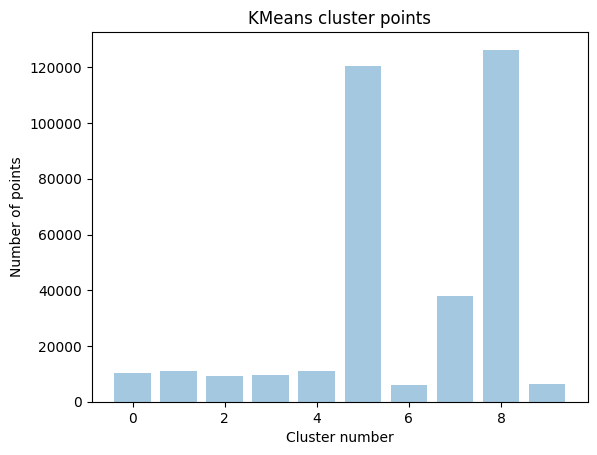

In [37]:
# visually how points or reviews are distributed across 10 clusters
import matplotlib.pyplot as plt

plt.bar([x for x in range(10)], df1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [38]:
# Reading a review which belong to each group.
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][5]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][10]]['Reviews'])
    print('\n')
    print(df1.iloc[df1.groupby(['Tfidf Clus Label']).groups[i][20]]['Reviews'])
    print('\n')
    print("_" * 70)

4 review of assigned to cluster  0
----------------------------------------------------------------------
Very good


EXCELLENT


This phone just didnt hold up to my expectations of what I thought it would be. There's a lot wrong with it


______________________________________________________________________
4 review of assigned to cluster  1
----------------------------------------------------------------------
It was a gift for my Grandma in South America and she loved it thanks!


I'm not a fan of touchscreen phones but when my trusted Nokia E71 gave up the ghost, I had to make that transition. This phone meets my needs. Nothing fancy, very nice size - fits perfectly in my palm - and I can finally download "Whatsapp". My siblings and friends have teased me to no end about not having a smartphone to download the app.I'm really not into specs but my husband, who is techy, took a look at the description and confirmed it would be perfect for my needs. I've had it for 4 days now and so 

In [39]:
i=0
list_of_sent=[]
for sent in final['CleanedReview'].values:
    list_of_sent.append(sent.split())

In [40]:
print(final['CleanedReview'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

feel lucki found use phone use hard phone line someon upgrad sold one son like old one final fell apart year didnt want upgrad thank seller realli appreci honesti said use phone recommend seller high would
*****************************************************************
['feel', 'lucki', 'found', 'use', 'phone', 'use', 'hard', 'phone', 'line', 'someon', 'upgrad', 'sold', 'one', 'son', 'like', 'old', 'one', 'final', 'fell', 'apart', 'year', 'didnt', 'want', 'upgrad', 'thank', 'seller', 'realli', 'appreci', 'honesti', 'said', 'use', 'phone', 'recommend', 'seller', 'high', 'would']


In [41]:
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [42]:
i=0
list_of_sent_train=[]
for sent in final['CleanedReview'].values:
    filtered_sentence=[]
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue
    list_of_sent_train.append(filtered_sentence)

In [43]:
import gensim
# Training the word2vec model using train dataset
w2v_model = gensim.models.Word2Vec(list_of_sent_train, vector_size=100, workers=4)

In [44]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

<ipython-input-44-162ab9b4d7a5>:13: RuntimeWarning: invalid value encountered in divide
  sent_vec /= cnt_words


(348057, 100)

In [45]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

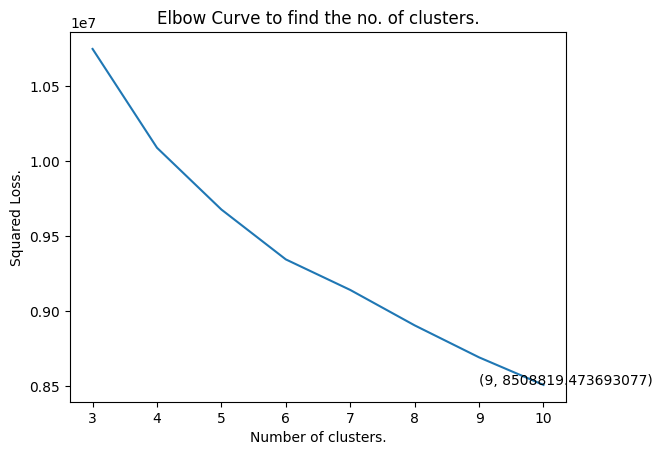

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  8508819.473693077


In [46]:
# Choosing the best cluster using Elbow Method.
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list

optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss.
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [47]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [48]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [49]:
word_cluster_center[1:2]

array([[ 0.32153861, -0.72305941, -0.60396387, -0.14742161,  0.0824067 ,
         0.91903176,  0.27522658, -0.77263783,  0.05993272,  0.24966055,
         0.52736102,  0.15972037,  0.41013356, -0.0438527 , -0.39637469,
         0.92878703,  0.04821919,  0.50211251,  0.19335864,  0.64529067,
         1.00984134, -0.11619015,  0.66710631,  0.26692908,  0.03553307,
        -0.09064643,  0.34429696, -0.00741859,  0.82129839, -0.24236022,
        -0.46473879,  0.31368201, -0.05969452,  0.08229179,  0.25146057,
         0.26370563, -0.69460852,  0.69831721,  0.23388757,  0.40056311,
         0.33838697,  0.44517289,  0.26504411,  0.90770761, -0.45868661,
         0.5494996 ,  0.51880532, -0.34895395, -0.68512659, -0.76000991,
        -0.44574735,  0.48041554,  0.52445838, -0.00870094,  0.58512757,
        -0.21278402, -0.46808274,  0.61205401,  0.43722606, -0.14171973,
        -0.08891918, -0.07000241,  0.18009405, -0.09017111,  1.19187814,
        -1.00565697, -0.36383699,  0.24211258,  1.5

In [50]:
# Giving Labels/assigning a cluster to each point/text
dfa = df1
dfa['AVG-W2V Clus Label'] = model2.labels_
dfa.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,CleanedReview,Tfidf Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucki found use phone use hard phone line...,5,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revu clean set e...,5,6


In [51]:
# How many points belong to each cluster ->
dfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     79213
1     46078
2     49129
3     10051
4      4718
5     28527
6    106413
7     13524
8     10404
Name: Reviews, dtype: int64

In [52]:
# Reading a review which belong to each group.
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


I already had a phone with problems... I know it stated it was used, but dang, it did not state that it did not charge. I wish I would have read these comments then I would have not purchased this item.... and its cracked on the side.. damaged goods is what it is.... If trying to charge it another way does not work I am requesting for my money back... AND I WILL GET MY MONEY BACK...SIGNED AN UNHAPPY CUSTOMER....


______________________________________________________________________
A review of assigned to clus

In [53]:
from sklearn.cluster import DBSCAN

In [54]:
# Computing 200th Nearest neighbour distance
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.

In [ ]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in sent_vectors[:348507]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:348507]) )
twohundrethneigh.sort()

In [ ]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

In [ ]:
dfdb = dfa
dfdb['AVG-W2V Clus Label'] = model.labels_
dfdb.head(2)

In [ ]:
dfdb.groupby(['AVG-W2V Clus Label'])['Id'].count()

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)# cut at 30 to get 5 clusters

In [ ]:

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
# Giving Labels/assigning a cluster to each point/text
aggdfa = dfdb
aggdfa['AVG-W2V Clus Label'] = cluster.labels_
aggdfa.head(2)

In [ ]:
# How many points belong to each cluster ->
aggdfa.groupby(['AVG-W2V Clus Label'])['Text'].count()

In [ ]:
# Reading a review which belong to each group.
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Text'])
    print('\n')
    print(aggdfa.iloc[aggdfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Text'])
    print('\n')
    print("_" * 70)

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**



In [ ]:
Indeed, traditional methods for organising data points according to similarity or distance metrics include K-means, DBSCAN,
and hierarchical clustering. Because of their respective advantages and disadvantages, they can be used with various kinds of d
ata and cluster architectures.On the other hand, NLP advances like Word2Vec and BERT make it possible to encode semantic meaning
and contextual understanding in textual data. While BERT considers a word's whole context within a sentence or document, producing
more complex embeddings, Word2Vec embeds words into a continuous vector space, capturing semantic associations.Ultimately, whatever
of these methods is used for a given task—clustering data points or deciphering the meanings and relationships of text—depends on the
type of data being used and its specifics.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

The exercises we had done are good and we had good hands on experience.


'''